In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

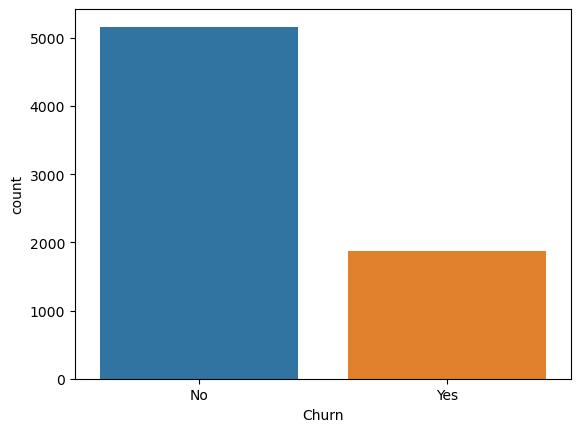

In [6]:
sns.countplot(data=df,x='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

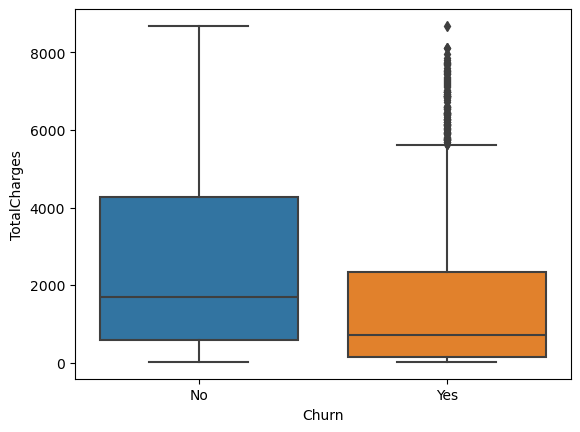

In [7]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

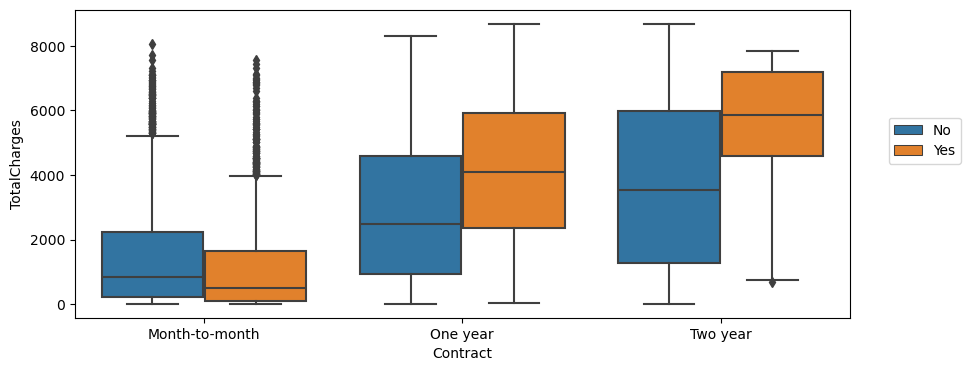

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.05,0.5))

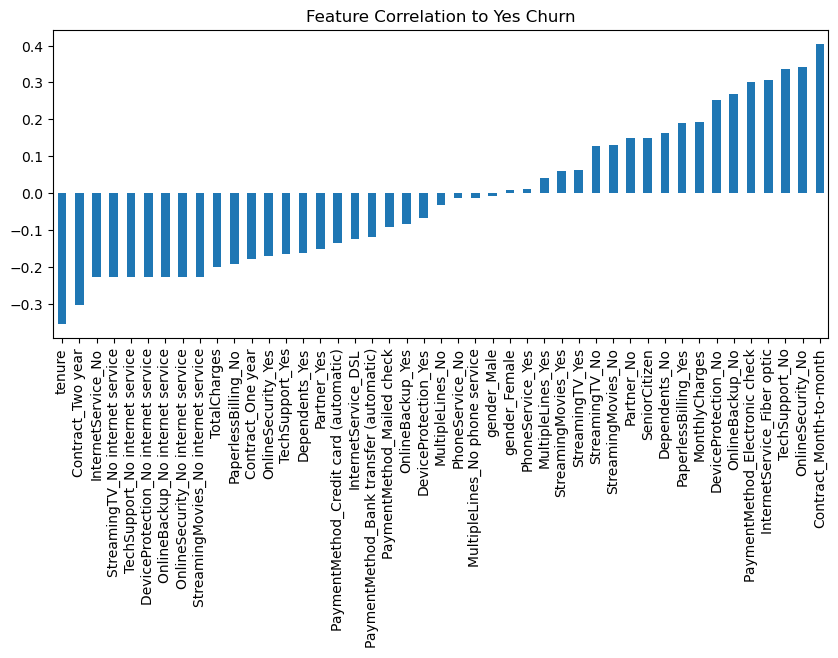

In [10]:
plt.figure(figsize=(10,4))
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]).corr()['Churn_Yes'].sort_values().iloc[1:-1].plot(kind='bar')
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

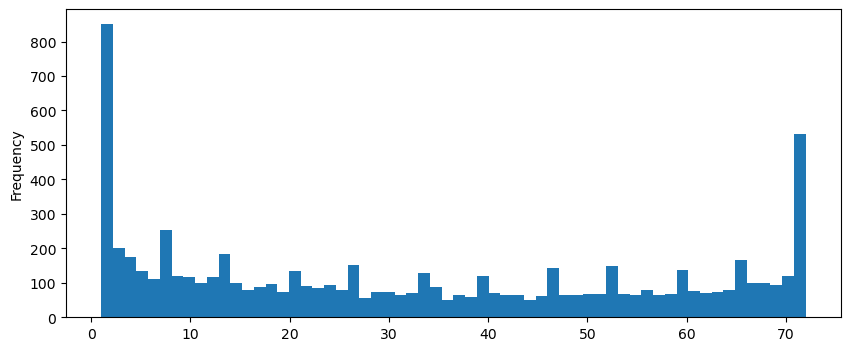

In [12]:
plt.figure(figsize=(10,4))
df['tenure'].plot(kind='hist',bins=60)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


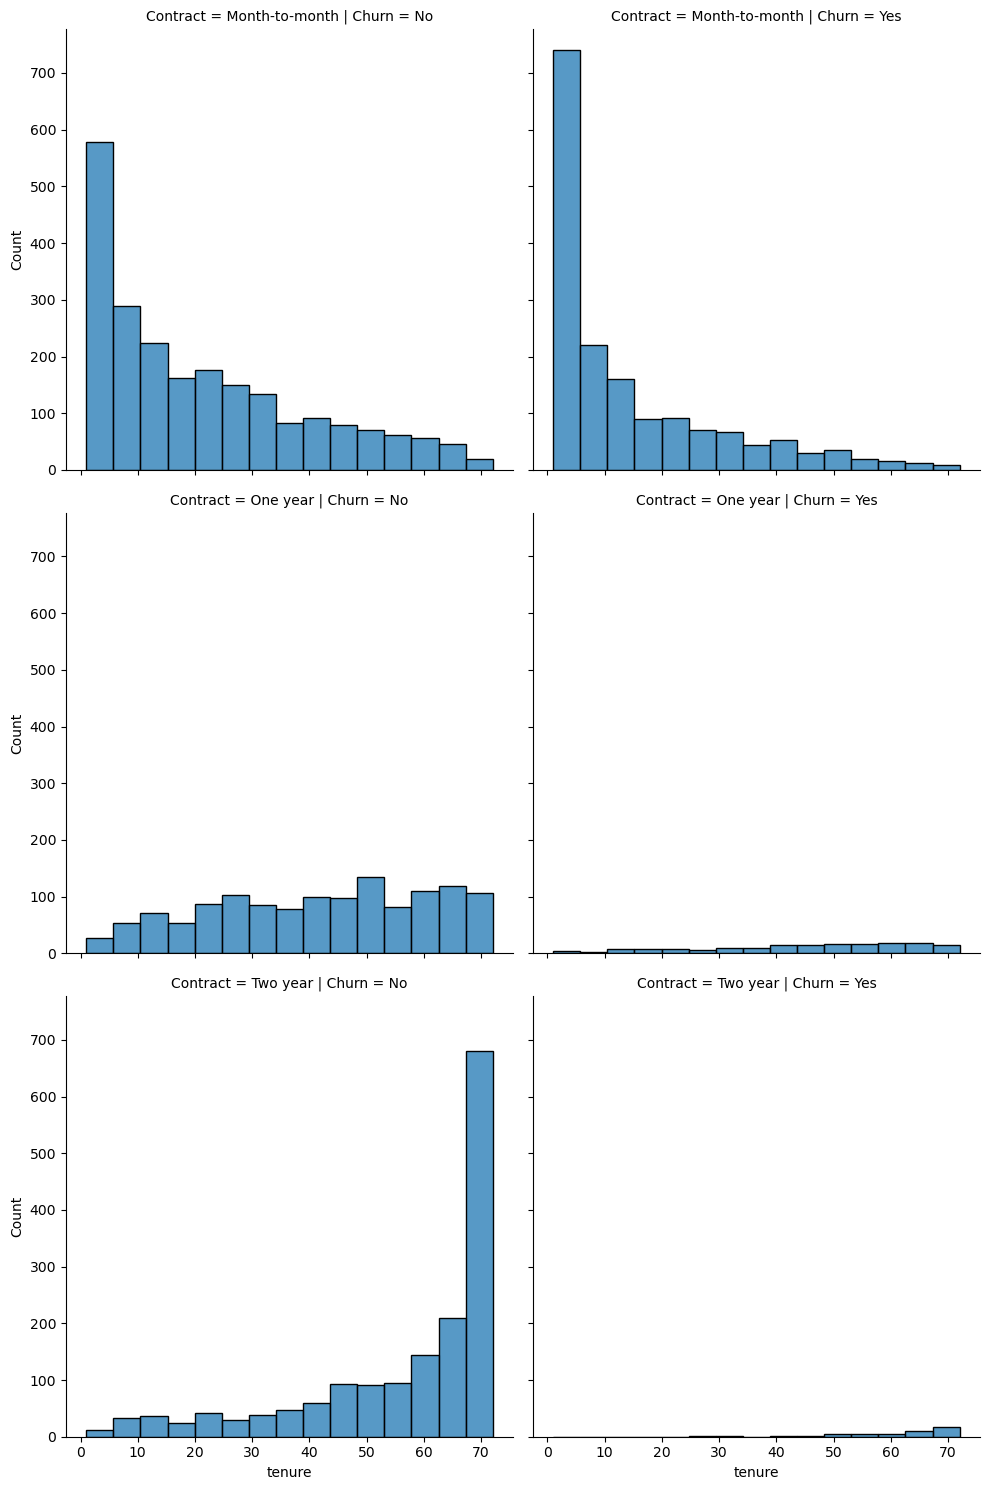

In [13]:
sns.displot(data=df,x='tenure',row='Contract',col='Churn')

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

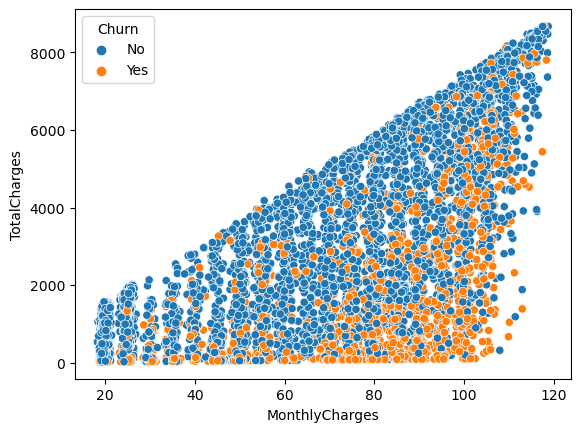

In [15]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')

In [16]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [17]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

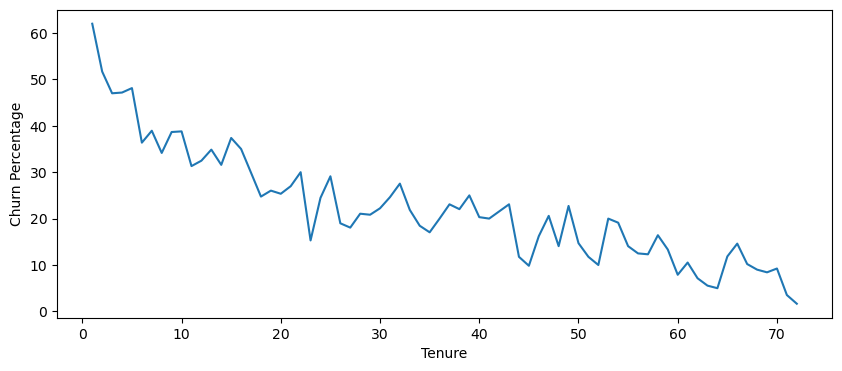

In [18]:
plt.figure(figsize=(10,4))
churn_rate.transpose()['customerID'].plot()
plt.ylabel('Churn Percentage')
plt.xlabel('Tenure')
plt.show()

In [19]:
def cohort(ten):
    if ten<13:
        return '0-12 months'
    elif ten < 25:
        return '12-24 months'
    elif ten<49:
        return '24-48 months'
    else:
        return 'over 48 months'

In [20]:
df['Tenure Cohort']= df['tenure'].apply(cohort)

In [21]:
df.head()[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 months
1,34,24-48 months
2,2,0-12 months
3,45,24-48 months
4,2,0-12 months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

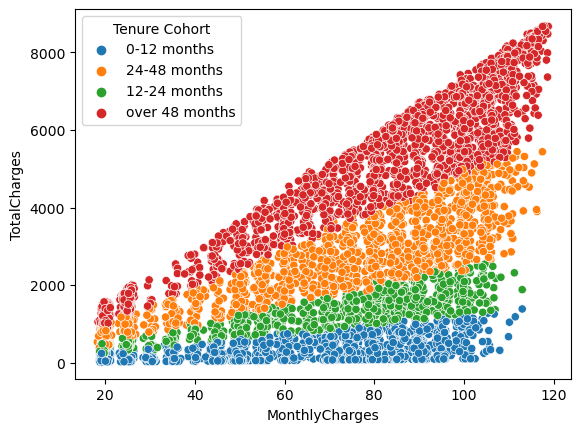

In [22]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

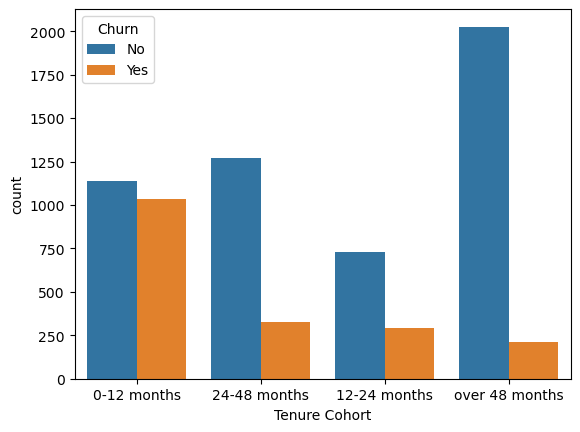

In [23]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

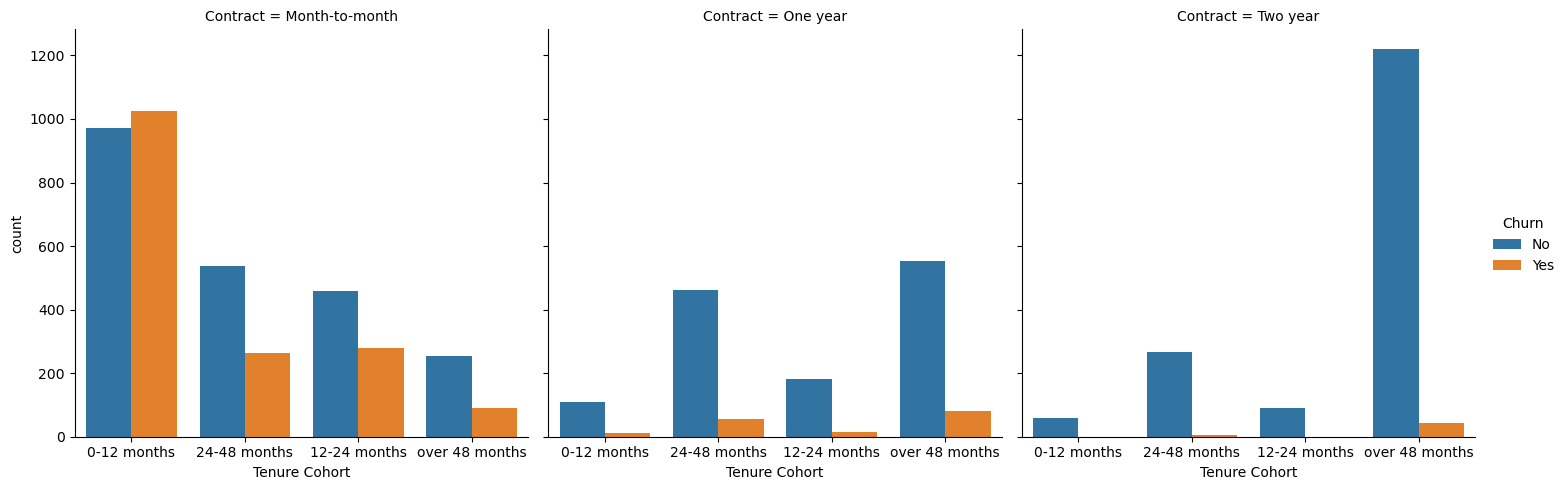

In [24]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind="count")

In [26]:
X = pd.get_dummies(df.drop(['Churn','customerID'], axis=1),drop_first=True)
y = df['Churn']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [37]:
pred = dt.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [39]:
confusion_matrix(y_test,pred)

array([[498,  59],
       [ 75,  72]])

In [40]:
dt.feature_importances_

array([0.0126805 , 0.42391407, 0.04348553, 0.06494213, 0.00123697,
       0.        , 0.        , 0.        , 0.00785158, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [46]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
#pred

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.87      0.86       557
         Yes       0.48      0.45      0.46       147

    accuracy                           0.78       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.78      0.78       704



In [43]:
confusion_matrix(y_test,pred)

array([[486,  71],
       [ 81,  66]])

In [44]:
#boosted tree
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [45]:
ada_model.fit(X_train,y_train)
pred = ada_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704

